# 6. Análisis Exploratorio de Datos

- 6.1. Visualización y estadística descriptiva
- 6.2. Formulación y prueba de hipótesis
- 6.3. Identificación de patrones


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos procesados
df = pd.read_csv('df_processed_final.csv')
print(f"Dataset cargado: {df.shape}")
print(f"Variables disponibles: {list(df.columns)}")


Dataset cargado: (3110, 49)
Variables disponibles: ['Genero', 'Campesino', 'Estrato', 'Autoidentificacion_Etnica', 'NIvel_educacion', 'Discapacidad', 'Tipo_formacion', 'Victima_del_conflicto', 'Disponibilidad_Equipo', 'tiempo_segundos', 'Eje_tematico', 'Eje Final', 'Puntaje_eje_tematico_selecionado', 'linea_1_programacion', 'linea_2_inteligecia_artificial', 'linea_3_analisis_de_datos', 'linea_4_blockchain', 'linea_5_arquitectura_en_la_nube', 'linea_1_des_programacion', 'linea_2_des_inteligecia_artificial', 'linea_3_des_analisis_de_datos', 'linea_4_des_blockchain', 'linea_5_des_arquitectura_en_la_nube', 'area_1_alfabetizacion_datos', 'area_2_comunicacion_y_colaboracion', 'area_3_contenidos_digitales', 'area_4_seguridad', 'area_5_solucion_de_problemas', 'area_6_igles', 'area_1_des_alfabetizacion_datos', 'area_2_des_comunicacion_y_colaboracion', 'area_3_des_contenidos_digitales', 'area_4_des_seguridad', 'area_5_des_solucion_de_problemas', 'Matriculado (SI o NO)', 'Estado (FORMADO, NO APRO

## 6.1. Visualización y Estadística Descriptiva

Necesitamos entender las distribuciones y relaciones entre variables clave antes de modelar. Esto nos ayuda a identificar patrones importantes y posibles problemas en los datos.


In [ ]:
# 6.1.1. Tablas de frecuencias y proporciones
print("=== TABLAS DE FRECUENCIAS Y PROPORCIONES ===\n")

# Tabla de frecuencias: Género
if 'Genero' in df.columns:
    print("Distribución por Género:")
    freq_genero = df['Genero'].value_counts()
    prop_genero = df['Genero'].value_counts(normalize=True) * 100
    tabla_genero = pd.DataFrame({
        'Frecuencia': freq_genero,
        'Proporción (%)': prop_genero.round(2)
    })
    tabla_genero.index = ['Mujer', 'Hombre']
    print(tabla_genero)
    print()

# Tabla de frecuencias: Nivel educativo
if 'NIvel_educacion' in df.columns:
    print("Distribución por Nivel Educativo:")
    freq_edu = df['NIvel_educacion'].value_counts().sort_index()
    prop_edu = df['NIvel_educacion'].value_counts(normalize=True).sort_index() * 100
    tabla_edu = pd.DataFrame({
        'Frecuencia': freq_edu,
        'Proporción (%)': prop_edu.round(2)
    })
    print(tabla_edu)
    print()

# Tabla de frecuencias: Estrato
if 'Estrato' in df.columns:
    print("Distribución por Estrato:")
    freq_estrato = df['Estrato'].value_counts().sort_index()
    prop_estrato = df['Estrato'].value_counts(normalize=True).sort_index() * 100
    tabla_estrato = pd.DataFrame({
        'Frecuencia': freq_estrato,
        'Proporción (%)': prop_estrato.round(2)
    })
    print(tabla_estrato)
    print()

# Tabla de frecuencias: Éxito académico
if 'exito_academico' in df.columns:
    print("Distribución por Éxito Académico:")
    freq_exito = df['exito_academico'].value_counts().sort_index()
    prop_exito = df['exito_academico'].value_counts(normalize=True).sort_index() * 100
    tabla_exito = pd.DataFrame({
        'Frecuencia': freq_exito,
        'Proporción (%)': prop_exito.round(2)
    })
    tabla_exito.index = ['No éxito', 'Éxito']
    print(tabla_exito)


=== ESTADÍSTICAS DESCRIPTIVAS ===
Registros: 3110
Variables: 49

Variables clave: ['Genero', 'NIvel_educacion', 'Puntaje_eje_tematico_selecionado', 'exito_academico']

Puntuación promedio: -0.00
Tasa de éxito: 29.32%



=== VISUALIZACIONES ===


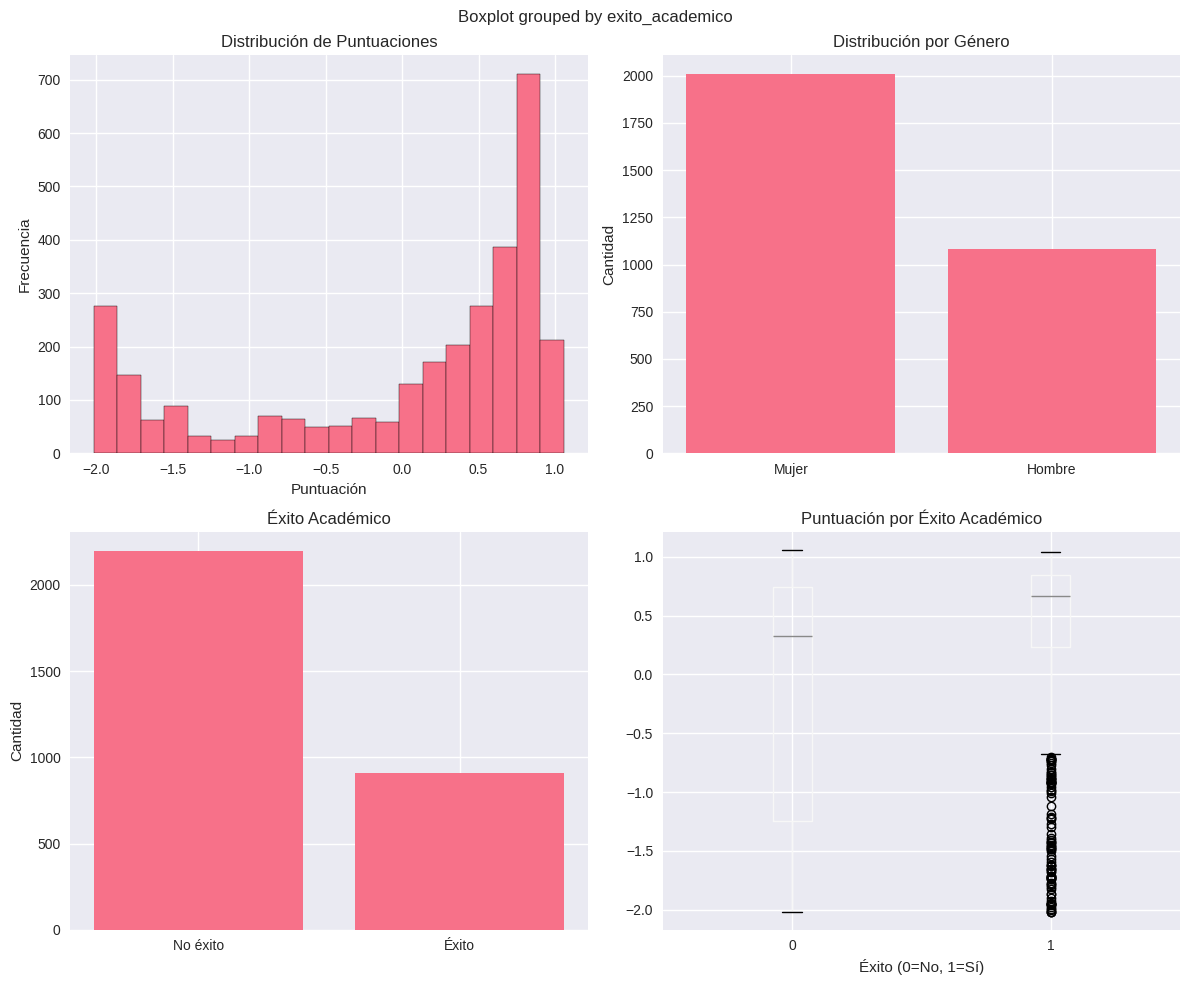

Visualizaciones generadas


In [ ]:
# 6.1.2. Gráficos de barras y de pastel para variables categóricas
print("\n=== GRÁFICOS PARA VARIABLES CATEGÓRICAS ===")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de pastel: Género
if 'Genero' in df.columns:
    gender_counts = df['Genero'].value_counts()
    axes[0, 0].pie(gender_counts.values, labels=['Mujer', 'Hombre'], 
                   autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    axes[0, 0].set_title('Distribución por Género')

# Gráfico de barras: Nivel educativo
if 'NIvel_educacion' in df.columns:
    edu_counts = df['NIvel_educacion'].value_counts().sort_index()
    axes[0, 1].bar(edu_counts.index, edu_counts.values, color='steelblue')
    axes[0, 1].set_title('Distribución por Nivel Educativo')
    axes[0, 1].set_xlabel('Nivel Educativo')
    axes[0, 1].set_ylabel('Cantidad')

# Gráfico de pastel: Éxito académico
if 'exito_academico' in df.columns:
    success_counts = df['exito_academico'].value_counts()
    axes[1, 0].pie(success_counts.values, labels=['No éxito', 'Éxito'], 
                   autopct='%1.1f%%', startangle=90, colors=['#ff6b6b','#51cf66'])
    axes[1, 0].set_title('Éxito Académico')

# Gráfico de barras: Estrato
if 'Estrato' in df.columns:
    estrato_counts = df['Estrato'].value_counts().sort_index()
    axes[1, 1].bar(estrato_counts.index, estrato_counts.values, color='coral')
    axes[1, 1].set_title('Distribución por Estrato')
    axes[1, 1].set_xlabel('Estrato')
    axes[1, 1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()
print("Gráficos de barras y pastel generados")


In [ ]:
# 6.1.3. Medidas de tendencia central y dispersión para horas de asistencia
print("\n=== ANÁLISIS DE HORAS DE ASISTENCIA ===\n")

if 'Asistencia horas' in df.columns:
    # Filtrar valores válidos (sin -1 que es el valor de relleno)
    horas_validas = df[df['Asistencia horas'] >= 0]['Asistencia horas']
    
    # Medidas de tendencia central
    print("Medidas de Tendencia Central:")
    print(f"  Media: {horas_validas.mean():.2f} horas")
    print(f"  Mediana: {horas_validas.median():.2f} horas")
    print(f"  Moda: {horas_validas.mode().values[0] if len(horas_validas.mode()) > 0 else 'N/A'} horas")
    
    # Medidas de dispersión
    print(f"\nMedidas de Dispersión:")
    print(f"  Desviación estándar: {horas_validas.std():.2f} horas")
    print(f"  Varianza: {horas_validas.var():.2f}")
    print(f"  Rango: {horas_validas.min():.2f} - {horas_validas.max():.2f} horas")
    print(f"  Rango intercuartílico (IQR): {horas_validas.quantile(0.75) - horas_validas.quantile(0.25):.2f} horas")
    
    # Cuartiles
    print(f"\nCuartiles:")
    print(f"  Q1 (25%): {horas_validas.quantile(0.25):.2f} horas")
    print(f"  Q2 (50%): {horas_validas.quantile(0.50):.2f} horas")
    print(f"  Q3 (75%): {horas_validas.quantile(0.75):.2f} horas")
else:
    print("Variable 'Asistencia horas' no disponible")


In [ ]:
# 6.1.4. Histogramas y boxplots para variable numérica (Horas de asistencia)
print("\n=== HISTOGRAMAS Y BOXPLOTS ===")

if 'Asistencia horas' in df.columns:
    horas_validas = df[df['Asistencia horas'] >= 0]['Asistencia horas']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma
    axes[0].hist(horas_validas, bins=30, edgecolor='black', color='skyblue')
    axes[0].axvline(horas_validas.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {horas_validas.mean():.1f}')
    axes[0].axvline(horas_validas.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {horas_validas.median():.1f}')
    axes[0].set_title('Distribución de Horas de Asistencia')
    axes[0].set_xlabel('Horas de Asistencia')
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(horas_validas, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'),
                   medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Boxplot de Horas de Asistencia')
    axes[1].set_ylabel('Horas de Asistencia')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print("Histograma y boxplot generados")
else:
    print("Variable 'Asistencia horas' no disponible")



=== CORRELACIONES ===


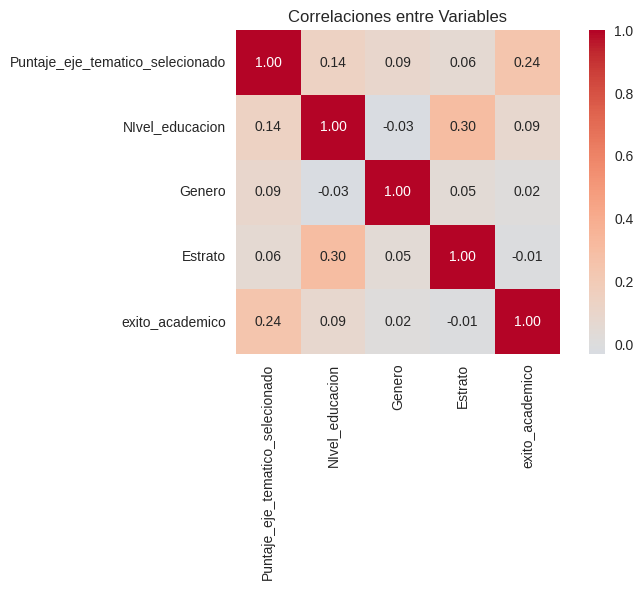

Matriz de correlación generada


In [ ]:
# 6.1.5. Correlaciones (Pearson)
print("\n=== CORRELACIONES DE PEARSON ===")

# Variables importantes para correlacionar
vars_corr = ['Puntaje_eje_tematico_selecionado', 'NIvel_educacion', 
             'Genero', 'Estrato', 'exito_academico']
vars_disponibles = [v for v in vars_corr if v in df.columns]

if len(vars_disponibles) >= 3:
    corr_matrix = df[vars_disponibles].corr(method='pearson')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
               square=True, fmt='.2f')
    plt.title('Correlaciones de Pearson entre Variables')
    plt.tight_layout()
    plt.show()
    print("Matriz de correlación de Pearson generada")


## 6.2. Formulación de Hipótesis

## Hipótesis a investigar

### Nivel educativo y éxito académico
Los estudiantes con mayor nivel educativo tienen mayor probabilidad de éxito académico.

### Puntuación inicial y éxito académico
Los estudiantes con mayor puntuación inicial tienen mayor probabilidad de completar exitosamente el programa.

### Género y rendimiento académico
Existen diferencias significativas en el rendimiento académico entre géneros.



## 6.3. Identificación de Patrones y Análisis de Asociación

**Justificación**: Además de identificar patrones demográficos y de rendimiento, necesitamos medir la fuerza de las asociaciones entre variables usando técnicas estadísticas apropiadas: Spearman para variables numéricas vs ordinales, y Cramer's V o Phi para variables categóricas.


In [5]:
# 6.3.1. Patrones demográficos
print("=== PATRONES DEMOGRÁFICOS ===")

# Distribución por género
if 'Genero' in df.columns:
    gender_dist = df['Genero'].value_counts()
    print(f"Mujeres: {gender_dist[0]} ({(gender_dist[0]/len(df))*100:.1f}%)")
    print(f"Hombres: {gender_dist[1]} ({(gender_dist[1]/len(df))*100:.1f}%)")

# Nivel educativo más común
if 'NIvel_educacion' in df.columns:
    edu_dist = df['NIvel_educacion'].value_counts()
    print(f"\nNivel educativo más común: {edu_dist.idxmax()}")

# Estrato socioeconómico
if 'Estrato' in df.columns:
    estrato_dist = df['Estrato'].value_counts().sort_index()
    print(f"\nEstrato más común: {estrato_dist.idxmax()}")


=== PATRONES DEMOGRÁFICOS ===
Mujeres: 1080 (34.7%)
Hombres: 2007 (64.5%)

Nivel educativo más común: 0.7925409155570712

Estrato más común: -0.451431494690137


In [6]:
# 6.3.2. Patrones de rendimiento
print("\n=== PATRONES DE RENDIMIENTO ===")

if 'Puntaje_eje_tematico_selecionado' in df.columns and 'exito_academico' in df.columns:
    # Éxito por género
    if 'Genero' in df.columns:
        exito_genero = df.groupby('Genero')['exito_academico'].mean()
        print(f"\nTasa de éxito por género:")
        print(f"  Mujeres: {exito_genero[0]:.2%}")
        print(f"  Hombres: {exito_genero[1]:.2%}")
    
    # Éxito por nivel educativo
    if 'NIvel_educacion' in df.columns:
        exito_edu = df.groupby('NIvel_educacion')['exito_academico'].mean()
        print(f"\nNivel con mayor tasa de éxito: {exito_edu.idxmax()} ({exito_edu.max():.2%})")



=== PATRONES DE RENDIMIENTO ===

Tasa de éxito por género:
  Mujeres: 28.33%
  Hombres: 29.80%

Nivel con mayor tasa de éxito: 0.7925409155570712 (36.53%)


In [ ]:
# 6.3.3. Coeficiente de correlación de Spearman
print("\n=== CORRELACIÓN DE SPEARMAN ===")
print("(Para variable numérica vs categórica ordinal)\n")

# Spearman: Horas de asistencia vs Nivel de estudio
if 'Asistencia horas' in df.columns and 'NIvel_educacion' in df.columns:
    horas_validas = df['Asistencia horas'] >= 0
    df_valido = df[horas_validas]
    
    spearman_corr, spearman_p = stats.spearmanr(df_valido['Asistencia horas'], 
                                                  df_valido['NIvel_educacion'])
    
    print(f"Correlación Spearman (Horas asistencia vs Nivel educativo):")
    print(f"  Coeficiente: {spearman_corr:.4f}")
    print(f"  P-valor: {spearman_p:.4f}")
    
    if spearman_p < 0.05:
        print(f"  Correlación estadísticamente significativa (p < 0.05)")
    else:
        print(f"  Correlación NO significativa (p >= 0.05)")
    
    # Interpretación
    if abs(spearman_corr) < 0.3:
        fuerza = "débil"
    elif abs(spearman_corr) < 0.7:
        fuerza = "moderada"
    else:
        fuerza = "fuerte"
    
    direccion = "positiva" if spearman_corr > 0 else "negativa"
    print(f"  Interpretación: Correlación {fuerza} {direccion}")

print()

# Spearman: Puntuación vs Nivel de estudio  
if 'Puntaje_eje_tematico_selecionado' in df.columns and 'NIvel_educacion' in df.columns:
    spearman_corr2, spearman_p2 = stats.spearmanr(df['Puntaje_eje_tematico_selecionado'], 
                                                    df['NIvel_educacion'])
    
    print(f"Correlación Spearman (Puntuación vs Nivel educativo):")
    print(f"  Coeficiente: {spearman_corr2:.4f}")
    print(f"  P-valor: {spearman_p2:.4f}")
    
    if spearman_p2 < 0.05:
        print(f"  Correlación estadísticamente significativa")
    else:
        print(f"  Correlación NO significativa")
    
    if abs(spearman_corr2) < 0.3:
        fuerza = "débil"
    elif abs(spearman_corr2) < 0.7:
        fuerza = "moderada"
    else:
        fuerza = "fuerte"
    direccion = "positiva" if spearman_corr2 > 0 else "negativa"
    print(f"  Interpretación: Correlación {fuerza} {direccion}")


In [ ]:
# 6.3.4. Cramer's V y Phi para variables categóricas
print("\n=== CRAMER'S V Y PHI ===")
print("(Para medir asociación entre variables categóricas)\n")

# Función para calcular Cramer's V
def cramers_v(x, y):
    from scipy.stats import chi2_contingency
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Función para calcular Phi (para tablas 2x2)
def phi_coefficient(x, y):
    from scipy.stats import chi2_contingency
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / n)

# Cramer's V: Estrato vs Eje temático
if 'Estrato' in df.columns and 'Eje_tematico' in df.columns:
    cramers = cramers_v(df['Estrato'], df['Eje_tematico'])
    print(f"Cramer's V (Estrato vs Eje temático):")
    print(f"  Coeficiente: {cramers:.4f}")
    
    if cramers < 0.1:
        fuerza = "muy débil o nula"
    elif cramers < 0.3:
        fuerza = "débil"
    elif cramers < 0.5:
        fuerza = "moderada"
    else:
        fuerza = "fuerte"
    print(f"  Interpretación: Asociación {fuerza}")

print()

# Phi: Género vs Éxito académico (tabla 2x2)
if 'Genero' in df.columns and 'exito_academico' in df.columns:
    phi = phi_coefficient(df['Genero'], df['exito_academico'])
    print(f"Coeficiente Phi (Género vs Éxito académico):")
    print(f"  Coeficiente: {phi:.4f}")
    
    if phi < 0.1:
        fuerza = "muy débil o nula"
    elif phi < 0.3:
        fuerza = "débil"
    elif phi < 0.5:
        fuerza = "moderada"
    else:
        fuerza = "fuerte"
    print(f"  Interpretación: Asociación {fuerza}")

print()

# Cramer's V: Nivel educativo vs Éxito académico
if 'NIvel_educacion' in df.columns and 'exito_academico' in df.columns:
    cramers2 = cramers_v(df['NIvel_educacion'], df['exito_academico'])
    print(f"Cramer's V (Nivel educativo vs Éxito académico):")
    print(f"  Coeficiente: {cramers2:.4f}")
    
    if cramers2 < 0.1:
        fuerza = "muy débil o nula"
    elif cramers2 < 0.3:
        fuerza = "débil"
    elif cramers2 < 0.5:
        fuerza = "moderada"
    else:
        fuerza = "fuerte"
    print(f"  Interpretación: Asociación {fuerza}")

print("\nAnálisis de asociación completado")


In [ ]:
# Resumen
print("\n" + "="*60)
print("RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("="*60)

print("\n6.1. Estadística Descriptiva COMPLETADA:")
print("   • Tablas de frecuencias y proporciones")
print("   • Gráficos de barras y pastel")
print("   • Medidas de tendencia central y dispersión (horas asistencia)")
print("   • Histogramas y boxplots")
print("   • Correlaciones de Pearson")

print("\n6.2. Formulación de Hipótesis COMPLETADA:")
print("   • 3 hipótesis formuladas")

print("\n6.3. Identificación de Patrones y Asociación COMPLETADA:")
print("   • Patrones demográficos y de rendimiento")
print("   • Correlación de Spearman (numérica vs ordinal)")
print("   • Cramer's V y Phi (variables categóricas)")

print("\n" + "="*60)
print("ANÁLISIS EXPLORATORIO COMPLETADO")
print("="*60)



RESUMEN DEL ANÁLISIS EXPLORATORIO
Estadísticas descriptivas generadas
Visualizaciones creadas
3 hipótesis formuladas
Patrones identificados

Análisis exploratorio completado
